In [29]:
import numpy as np
from math import sin, cos, pi
from random import randint, uniform
import matplotlib.pyplot as plt

In [30]:
t = np.arange(0, 2*pi, 0.025)
a = [0.4, 0.7, 1]
b = [0.15, 0.5, 1]
alpha = [pi/6,-pi/3,0]
x = lambda t,n: a[n]*cos(t)*cos(alpha[n]) - b[n]*sin(t)*sin(alpha[n])
y = lambda t,n: a[n]*cos(t)*sin(alpha[n]) + b[n]*sin(t)*cos(alpha[n])

## Первый этап

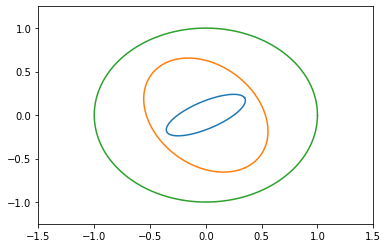

In [31]:
plt.xlim(-1.5, 1.5)
plt.ylim(-1.25, 1.25)
plt.plot([x(i,0) for i in t],[y(i,0) for i in t])
plt.plot([x(i,1) for i in t],[y(i,1) for i in t])
plt.plot([x(i,2) for i in t],[y(i,2) for i in t])

## Создание даты и выборок для обучения и теста

In [32]:
data = []
for i in t:
    data.append([[x(i,0),y(i,0)],[1,0,0]])
    data.append([[x(i,1),y(i,1)],[0,1,0]])
    data.append([[x(i,2),y(i,2)],[0,0,1]])
len(data)

756

In [33]:
import random
from sklearn.model_selection import train_test_split

In [34]:
random.shuffle(data)
x_train, x_test, y_train, y_test = train_test_split([x[0] for x in data], [x[1] for x in data], test_size=0.2)

## Создадим нейронную сеть с обратным распространением ошибки

In [44]:
class Linear:
    def __init__(self, nin, nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
    def forward(self, x):
        self.x = x
        return np.dot(x, self.W.T) + self.b

In [51]:
class Net:
    def __init__(self):
        self.layers = []
    def add(self, l):
        self.layers.append(l)
    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x

In [52]:
net = Net()
net.add(Linear(2,3))
net.add(Linear(3,3))

In [53]:
net.forward(x_train[0])

array([[ 0.20869848,  0.03089058, -0.19988212]])

In [54]:
y_train[0]

[1, 0, 0]

In [35]:
class Linear:
    def __init__(self,nin,nout):
        
        
    def forward(self, x):
        
    
    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx
    
    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db

In [36]:
class Net:
    def __init__(self):
        self.layers = []
    
    def add(self,l):
        self.layers.append(l)
        
    
    
    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z
    
    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)
    
    def get_loss_acc(self, x, y):
        p = self.forward(x)
        l = self.loss.forward(p,y)
        true_label = np.argmax(y,axis=1)
        pred_label = np.argmax(p,axis=1)
        acc = (pred_label==true_label).mean()
        return l, acc
    
    def fit(self, X_train, y_train, batch_size=4, epochs=5, validation_data=None, lr=0.3):
        X_test, y_test = validation_data
        history = []
        train_loss, train_acc = self.get_loss_acc(X_train, y_train)
        test_loss, test_acc = self.get_loss_acc(X_test, y_test)
        history.append([train_acc,train_loss,test_acc,test_loss])
        
        for epo in range(epochs):
            for i in range(0,len(X_train),batch_size):
                xb = X_train[i:i+batch_size]
                yb = y_train[i:i+batch_size]
                p = self.forward(xb)
                l = self.loss.forward(p,yb)
                dp = self.loss.backward(l)
                dx = self.backward(dp)
                net.update(lr)
            train_loss, train_acc = self.get_loss_acc(X_train, y_train)
            test_loss, test_acc = self.get_loss_acc(X_test, y_test)
            history.append([train_acc,train_loss,test_acc,test_loss])
        return history

In [37]:
net = Net()
net.add(Linear(np.array(x_test).shape[-1], np.array(y_test).shape[-1]))
net.add(Softmax())

hist = net.fit(np.array(x_train), np.array(y_train), lr=0.01, epochs=50, batch_size=256, validation_data=(np.array(x_test), np.array(y_test)))

AttributeError: 'Net' object has no attribute 'loss'

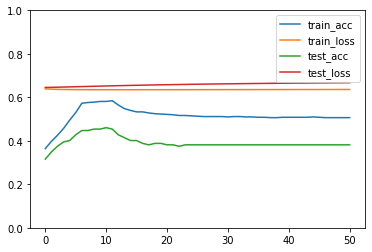

In [38]:
plt.clf()
plt.ylim(0, 1.0)
for i in range(4):
    plt.plot([val[i] for val in hist], label=['train_acc','train_loss','test_acc','test_loss'][i])
plt.legend()

## Второй этап

In [7]:
t = np.arange(0,3.5,0.01)
x = lambda t: sin(sin(t) * t**2 + 5 * t)